# Replication script for the paper "Generating Abstract Tests for Asmeta Models by Using Code Transformations and EvoSuite"

This script is used to replicate the results of the analyses presented in the paper.

## Data preparation


In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

Loading the necessary data

We read the file `data.csv` that contains the results of the test generation process with the three approaches: **atgt**, and **evoavalla**, and **random**.

We have three configuration for random generation: **random** with 10 scenarios of 10 steps each, **random4ea** with the same number of scenarios and steps as generated by **evoavalla**, and **random4atgt** with the same number of scenarios and steps as generated by **atgt**

In [13]:
# Define a general dataframe to hold all data
all_data = pd.DataFrame()

data = f'data.csv'
valid_models = f'model_lists/model_list_all_valid.txt'

# Read valid models
with open(valid_models, 'r') as file:
    valid_model_list = [line.strip() for line in file.readlines()]

# Read and filter ATGT and EvoAvalla data
df = pd.read_csv(data, sep=',')
df['asm_path'] = df['asm_path'].str.replace('../../../asm_examples/', '', regex=False)
df = df[df['asm_path'].isin(valid_model_list)]
# Exclude rows where approach is 'random'
df = df[df['approach'] != 'random']

# Change the decimal separator from . to , in the branch_coverage column
df['branch_coverage'] = df['branch_coverage'].astype(float)
df['rule_coverage'] = df['rule_coverage'].astype(float)
df['update_rule_coverage'] = df['update_rule_coverage'].astype(float)
df['macro_coverage'] = df['macro_coverage'].astype(float)

print (df.shape)

(160, 29)


## RQ2: Test generation time

Approach: Random_EA, Mean Execution Time: 10.05, Std Dev: 20.37
Approach: Random_ATGT, Mean Execution Time: 93.15, Std Dev: 297.17
Approach: EvoAvalla, Mean Execution Time: 69276.00, Std Dev: 5653.05
Approach: ATGT, Mean Execution Time: 11108.67, Std Dev: 61646.74
Wilcoxon test between EvoAvalla and atgt: statistic=40.0, p-value=1.5819750842638314e-08
Wilcoxon test between Random4ea and atgt: statistic=0.0, p-value=3.568126323893353e-08
Wilcoxon test between Random4atgt and atgt: statistic=0.0, p-value=3.5668648332760216e-08
Wilcoxon test between EvoAvalla and Random4ea: statistic=0.0, p-value=1.8189894035458565e-12


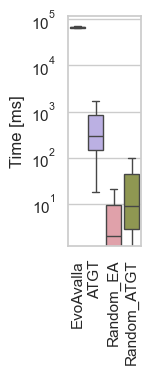

In [14]:
# Rename the approaches for better visualization
df['approach'] = df['approach'].replace({'evoavalla': 'EvoAvalla', 'atgt': 'ATGT', 'random4ea': 'Random_EA', 'random4atgt': 'Random_ATGT'})
approach_order = ['EvoAvalla', 'ATGT', 'Random_EA', 'Random_ATGT']

# For each approach, calculate the mean and standard deviation of the 'exec_time' column    
for approach in df['approach'].unique():
    # Filter the dataframe for the current approach
    approach_data = df[df['approach'] == approach]

    # Calculate mean and standard deviation
    mean_exec_time = approach_data['exec_time_ms'].mean()
    std_exec_time = approach_data['exec_time_ms'].std()

    # Print the results
    print(f"Approach: {approach}, Mean Execution Time: {mean_exec_time:.2f}, Std Dev: {std_exec_time:.2f}")

# Perform Wilcoxon signed-rank test for time between EvoAvalla and ATGT
evoavalla_data = df[df['approach'] == 'EvoAvalla']['exec_time_ms']
atgt_data = df[df['approach'] == 'ATGT']['exec_time_ms']
random4ea_data = df[df['approach'] == 'Random_EA']['exec_time_ms']
random4atgt_data = df[df['approach'] == 'Random_ATGT']['exec_time_ms']
# Perform Wilcoxon signed-rank test for time between evoavalla and ATGT
stat, p_value = wilcoxon(evoavalla_data, atgt_data, alternative='two-sided',nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and atgt: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for time between Random and ATGT
stat, p_value = wilcoxon(random4ea_data, atgt_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between Random4ea and atgt: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for time between Random and ATGT
stat, p_value = wilcoxon(random4atgt_data, atgt_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between Random4atgt and atgt: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for time between EvoAvalla and Random
stat, p_value = wilcoxon(evoavalla_data, random4ea_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and Random4ea: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for time between Random and evoavalla
stat, p_value = wilcoxon(random4atgt_data, evoavalla_data, alternative='two-sided', nan_policy='omit')

# Draw a boxplot for mutation score and approaches
sns.set(style="whitegrid")
# Create a boxplot
plt.figure(figsize=(2, 3))
# EvoAvalla must be blue, Random must be orange, and ATGT must be green
palette = ['#ea96a3', '#98a247', '#4aaba4', '#b6a8eb']
sns.boxplot(x='approach', y='exec_time_ms', data=df, order=approach_order, hue='approach', palette=palette, showfliers=False)           
plt.xlabel('')
plt.yscale('log')
plt.ylabel('Time [ms]')
plt.tight_layout()
plt.xticks(rotation=90) 
# Save the image as pdf
plt.savefig(f'images/boxplot_exec_time.pdf', bbox_inches='tight')  

## RQ3: Size of test suites

Approach: EvoAvalla, Mean n_scenarios: 10.10, Std Dev: 16.65
Approach: ATGT, Mean n_scenarios: 19.80, Std Dev: 32.19
Wilcoxon test between EvoAvalla and atgt: statistic=36.5, p-value=1.942714822378656e-06


C:\Users\nicop\AppData\Local\Temp\ipykernel_3352\3420641641.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x='approach', y='n_scenarios', data=df[df['approach'] != 'Random_EA'][df['approach'] != 'Random_ATGT'], hue='approach', palette=palette, showfliers=False)


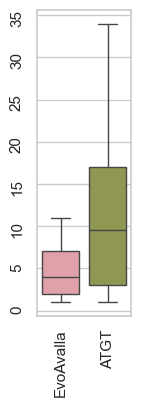

In [15]:
# For each approach, calculate the mean and standard deviation of the 'n_scenarios' column
# Then, draw a boxplot for n_scenarios and approaches, but excluding Random approaches
for approach in df['approach'].unique():
    if 'Random' in approach:
        continue
    # Filter the dataframe for the current approach
    approach_data = df[df['approach'] == approach]

    # Calculate mean and standard deviation
    mean_n_scenarios = approach_data['n_scenarios'].mean()
    std_n_scenarios = approach_data['n_scenarios'].std()

    # Print the results
    print(f"Approach: {approach}, Mean n_scenarios: {mean_n_scenarios:.2f}, Std Dev: {std_n_scenarios:.2f}")
    
# Perform Wilcoxon signed-rank test for time between EvoAvalla and ATGT
evoavalla_data = df[df['approach'] == 'EvoAvalla']['n_scenarios']
atgt_data = df[df['approach'] == 'ATGT']['n_scenarios']
# Perform Wilcoxon signed-rank test for time between evoavalla and ATGT
stat, p_value = wilcoxon(evoavalla_data, atgt_data, alternative='two-sided',nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and atgt: statistic={stat}, p-value={p_value}")

# Draw a boxplot for mutation score and approaches
sns.set(style="whitegrid")
# Create a boxplot
plt.figure(figsize=(1.6, 3.7))
# EvoAvalla must be blue, Random must be orange, and ATGT must be green
palette = ['#ea96a3', '#98a247']
sns.boxplot(x='approach', y='n_scenarios', data=df[df['approach'] != 'Random_EA'][df['approach'] != 'Random_ATGT'], hue='approach', palette=palette, showfliers=False)         
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.xticks(rotation=90) 
plt.yticks(rotation=90) 
# Save the image as pdf
plt.savefig(f'images/boxplot_n_scenarios.pdf', bbox_inches='tight')     

Approach: EvoAvalla, Mean n_step: 28.77, Std Dev: 40.99
Approach: ATGT, Mean n_step: 1065.70, Std Dev: 5694.01
Wilcoxon test between EvoAvalla and atgt: statistic=23.5, p-value=2.0310851537853697e-07


C:\Users\nicop\AppData\Local\Temp\ipykernel_3352\2459758384.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x='approach', y='n_step', data=df[df['approach'] != 'Random_EA'][df['approach'] != 'Random_ATGT'], hue='approach', palette=palette, showfliers=False)


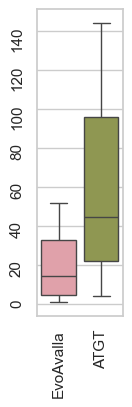

In [16]:
# For each approach, calculate the mean and standard deviation of the 'n_step' column
# Then, draw a boxplot for n_step and approaches, but excluding Random approaches
for approach in df['approach'].unique():
    if 'Random' in approach:
        continue
    # Filter the dataframe for the current approach
    approach_data = df[df['approach'] == approach]

    # Calculate mean and standard deviation
    mean_n_steps = approach_data['n_step'].mean()
    std_n_steps = approach_data['n_step'].std()

    # Print the results
    print(f"Approach: {approach}, Mean n_step: {mean_n_steps:.2f}, Std Dev: {std_n_steps:.2f}")
    
# Perform Wilcoxon signed-rank test for time between EvoAvalla and ATGT
evoavalla_data = df[df['approach'] == 'EvoAvalla']['n_step']
atgt_data = df[df['approach'] == 'ATGT']['n_step']
# Perform Wilcoxon signed-rank test for time between evoavalla and ATGT
stat, p_value = wilcoxon(evoavalla_data, atgt_data, alternative='two-sided',nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and atgt: statistic={stat}, p-value={p_value}")

# Draw a boxplot for mutation score and approaches
sns.set(style="whitegrid")
# Create a boxplot
plt.figure(figsize=(1.6, 3.7))
# EvoAvalla must be blue, Random must be orange, and ATGT must be green
palette = ['#ea96a3', '#98a247']
sns.boxplot(x='approach', y='n_step', data=df[df['approach'] != 'Random_EA'][df['approach'] != 'Random_ATGT'], hue='approach', palette=palette, showfliers=False)         
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.xticks(rotation=90) 
plt.yticks(rotation=90) 
# Save the image as pdf
plt.savefig(f'images/boxplot_n_step.pdf', bbox_inches='tight')   

## RQ4: Coverage

In [17]:
# List of all coverage types
coverage_types = ['branch_coverage', 'rule_coverage', 'update_rule_coverage', 'macro_coverage']

# For each coverage type, calcolute mean and standard deviation
for coverage in coverage_types:
    print (f"\nCoverage Type: {coverage}")
    # For each approach, calculate the mean and standard deviation of the coverage column
    for approach in df['approach'].unique():
        # Filter the dataframe for the current approach
        approach_data = df[df['approach'] == approach]

        # Calculate mean and standard deviation
        mean_coverage = approach_data[coverage].mean()
        std_coverage = approach_data[coverage].std()

        # Print the results
        print(f"Approach: {approach}, Mean {coverage}: {mean_coverage:.2f}, Std Dev: {std_coverage:.2f}")

    # Perform Wilcoxon signed-rank test for coverage between EvoAvalla and ATGT
    evoavalla_data = df[df['approach'] == 'EvoAvalla'][coverage]
    atgt_data = df[df['approach'] == 'ATGT'][coverage]
    random4ea_data = df[df['approach'] == 'Random_EA'][coverage]
    random4atgt_data = df[df['approach'] == 'Random_ATGT'][coverage]
    # Perform Wilcoxon signed-rank test for coverage between evoavalla and ATGT
    stat, p_value = wilcoxon(evoavalla_data, atgt_data, alternative='two-sided',nan_policy='omit')
    # Print the results of the Wilcoxon test
    print(f"Wilcoxon test between EvoAvalla and atgt: statistic={stat}, p-value={p_value}")
    # Perform Wilcoxon signed-rank test for coverage between Random and ATGT
    stat, p_value = wilcoxon(random4ea_data, atgt_data, alternative='two-sided', nan_policy='omit')
    # Print the results of the Wilcoxon test
    print(f"Wilcoxon test between Random4ea and atgt: statistic={stat}, p-value={p_value}")
    # Perform Wilcoxon signed-rank test for coverage between Random and ATGT
    stat, p_value = wilcoxon(random4atgt_data, atgt_data, alternative='two-sided', nan_policy='omit')
    # Print the results of the Wilcoxon test
    print(f"Wilcoxon test between Random4atgt and atgt: statistic={stat}, p-value={p_value}")
    # Perform Wilcoxon signed-rank test for coverage between EvoAvalla and Random
    stat, p_value = wilcoxon(evoavalla_data, random4ea_data, alternative='two-sided', nan_policy='omit')
    # Print the results of the Wilcoxon test
    print(f"Wilcoxon test between EvoAvalla and Random4ea: statistic={stat}, p-value={p_value}")
    # Perform Wilcoxon signed-rank test for coverage between Random and evoavalla
    stat, p_value = wilcoxon(random4atgt_data, evoavalla_data, alternative='two-sided', nan_policy='omit')
    # Print the results of the Wilcoxon test
    print(f"Wilcoxon test between Random4atgt and Evoavalla: statistic={stat}, p-value={p_value}")



Coverage Type: branch_coverage
Approach: Random_EA, Mean branch_coverage: 0.58, Std Dev: 0.24
Approach: Random_ATGT, Mean branch_coverage: 0.77, Std Dev: 0.21
Approach: EvoAvalla, Mean branch_coverage: 0.85, Std Dev: 0.21
Approach: ATGT, Mean branch_coverage: 0.97, Std Dev: 0.07
Wilcoxon test between EvoAvalla and atgt: statistic=60.0, p-value=0.001126593862520505
Wilcoxon test between Random4ea and atgt: statistic=0.0, p-value=7.694355910416081e-08
Wilcoxon test between Random4atgt and atgt: statistic=0.0, p-value=3.7732222813413115e-06
Wilcoxon test between EvoAvalla and Random4ea: statistic=1.0, p-value=5.863688880736523e-07
Wilcoxon test between Random4atgt and Evoavalla: statistic=124.5, p-value=0.04428647476394012

Coverage Type: rule_coverage
Approach: Random_EA, Mean rule_coverage: 0.56, Std Dev: 0.23
Approach: Random_ATGT, Mean rule_coverage: 0.75, Std Dev: 0.20
Approach: EvoAvalla, Mean rule_coverage: 0.92, Std Dev: 0.21
Approach: ATGT, Mean rule_coverage: 0.98, Std Dev: 0.0

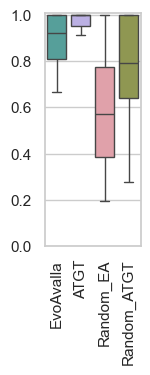

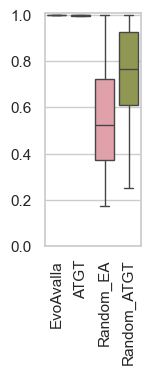

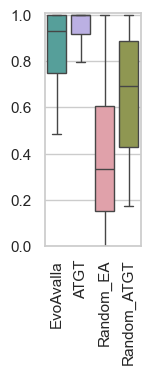

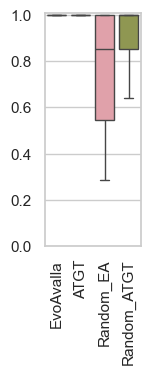

In [18]:
# Draw a plot for each coverage type
for coverage in coverage_types:
    # Generate a box-plot with the update rule, macro and coverage for all approaches
    sns.set(style="whitegrid")
    # Create a boxplot
    plt.figure(figsize=(2, 3))
    # EvoAvalla must be blue, Random must be orange, and ATGT must be green
    palette = ['#ea96a3', '#98a247', '#4aaba4', '#b6a8eb']
    sns.boxplot(x='approach', y=coverage, data=df, order=approach_order, hue='approach', palette=palette, showfliers=False)

    # set log scale for y-axis
    plt.xlabel('')
    plt.ylabel('')
    # Sey y axis from 0 to 1.1
    plt.ylim(0, 1.01)
    plt.tight_layout()
    plt.xticks(rotation=90)

    # Save the image as pdf
    plt.savefig(f'images/boxplot_{coverage}.pdf', bbox_inches='tight')

## RQ4: Mutation score


Mutation Score Analysis:
Approach: Random_EA, Mean mutation score: 0.46, Std Dev: 0.23
Approach: Random_ATGT, Mean mutation score: 0.61, Std Dev: 0.19
Approach: EvoAvalla, Mean mutation score: 0.62, Std Dev: 0.27
Approach: ATGT, Mean mutation score: 0.72, Std Dev: 0.11
Wilcoxon test between EvoAvalla and atgt: statistic=308.0, p-value=0.6944263662737999
Wilcoxon test between Random4ea and atgt: statistic=1.0, p-value=8.38735519312415e-08
Wilcoxon test between Random4atgt and atgt: statistic=39.0, p-value=2.5837891244850853e-05
Wilcoxon test between EvoAvalla and Random4ea: statistic=97.5, p-value=0.00021568658680202546
Wilcoxon test between Random4atgt and Evoavalla: statistic=252.0, p-value=0.13330585574595727


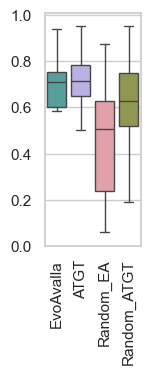

In [19]:
# For each model and approach, calculate the average mutation score. Consider the mutation scores in the columns 'casemutator_score', 'rulemutator_score', 'choosemutator_score' and exclude from the computation the values NaN.
# Then, calculate mean and standard deviation of mutation scores for each approach.
mutation_score_columns = ['casemutator_score', 'ruleremover_score', 'chooserulemutator_score', 'condnegator_score', 'forallmutator_score', 'partoseqmutator_score', 'seqtoparmutator_score', 'condremover_score']
df['mutation_score'] = df[mutation_score_columns].mean(axis=1, skipna=True)
print ("\nMutation Score Analysis:")
for approach in df['approach'].unique():
    # Filter the dataframe for the current approach
    approach_data = df[df['approach'] == approach]

    # Calculate mean and standard deviation
    mean_mutation_score = approach_data['mutation_score'].mean()
    std_mutation_score = approach_data['mutation_score'].std()

    # Print the results
    print(f"Approach: {approach}, Mean mutation score: {mean_mutation_score:.2f}, Std Dev: {std_mutation_score:.2f}")

# Perform Wilcoxon signed-rank test for coverage between Random and ATGT
evoavalla_data = df[df['approach'] == 'EvoAvalla']['mutation_score']
atgt_data = df[df['approach'] == 'ATGT']['mutation_score']
random4ea_data = df[df['approach'] == 'Random_EA']['mutation_score']
random4atgt_data = df[df['approach'] == 'Random_ATGT']['mutation_score']
# Perform Wilcoxon signed-rank test for coverage between evoavalla and ATGT
stat, p_value = wilcoxon(evoavalla_data, atgt_data, alternative='two-sided',nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and atgt: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for coverage between Random and ATGT
stat, p_value = wilcoxon(random4ea_data, atgt_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between Random4ea and atgt: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for coverage between Random and ATGT
stat, p_value = wilcoxon(random4atgt_data, atgt_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between Random4atgt and atgt: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for coverage between EvoAvalla and Random
stat, p_value = wilcoxon(evoavalla_data, random4ea_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between EvoAvalla and Random4ea: statistic={stat}, p-value={p_value}")
# Perform Wilcoxon signed-rank test for coverage between Random and evoavalla
stat, p_value = wilcoxon(random4atgt_data, evoavalla_data, alternative='two-sided', nan_policy='omit')
# Print the results of the Wilcoxon test
print(f"Wilcoxon test between Random4atgt and Evoavalla: statistic={stat}, p-value={p_value}")  

# Draw a boxplot for mutation score and approaches
sns.set(style="whitegrid")
# Create a boxplot
plt.figure(figsize=(2, 3))
# EvoAvalla must be blue, Random must be orange, and ATGT must be green
palette = ['#ea96a3', '#98a247', '#4aaba4', '#b6a8eb']
sns.boxplot(x='approach', y='mutation_score', data=df, order=approach_order, hue='approach', palette=palette, showfliers=False)           
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 1.01)
plt.tight_layout()
plt.xticks(rotation=90) 
# Save the image as pdf
plt.savefig(f'images/boxplot_mutation_score.pdf', bbox_inches='tight')  